## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## 2. Import Data

In [2]:
university_data=pd.read_csv('Universities.csv')
university_data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


## 3. Initial Analysis 

In [3]:
university_data.shape

(25, 7)

In [4]:
university_data.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [5]:
university_data.dtypes

Univ        object
SAT          int64
Top10        int64
Accept       int64
SFRatio      int64
Expenses     int64
GradRate     int64
dtype: object

In [6]:
university_data.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


## 4. Data Pre-Processing 

In [7]:
# User-defined Function for normalizing data
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
university_data.iloc[:,1:]=university_data.iloc[:,1:].apply(norm_func)
university_data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,CalTech,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,CMU,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,Columbia,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,Cornell,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


## 5. Model Building

### Plotting Dendogram

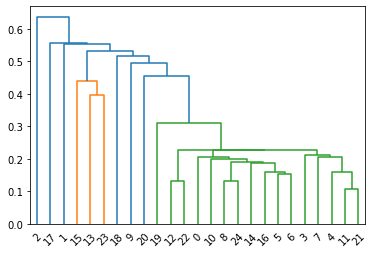

In [9]:
dendogram=sch.dendrogram(sch.linkage(university_data.iloc[:,1:], method='single'))

In [10]:
h_clustring=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [11]:
# fit and predict
clusters=h_clustring.fit_predict(university_data.iloc[:,1:])
print(clusters)

[0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]


In [12]:
university_data['Cluster']=clusters

In [13]:
university_data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,CalTech,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,3
2,CMU,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,1
3,Columbia,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,Cornell,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0


## The End!!!